# Chapter 4 - Predict the Sentiment

Neste capítulo final, usaremos um modelo de aprendizado supervisionado para prever o sentimento.

**Problemas de classificação**

Imagine que estamos trabalhando com as análises do produto. Uma tarefa de aprendizagem supervisionada tentará classificar qualquer nova avaliação como positiva ou negativa com base nas avaliações já rotuladas. Isso é o que chamamos de problema de classificação. No caso das resenhas de produtos e filmes, temos duas classes - positivas e negativas. Este é um problema de classificação binária. Os dados do Twitter sobre o sentimento das companhias aéreas têm três categorias de sentimento: positivo, neutro e negativo. Este é um problema de classificação multiclasse.

**Regressões lineares e logísticas**

Um algoritmo comumente aplicado em tarefas de classificação é uma regressão logística. Você pode estar familiarizado com uma regressão linear, onde ajustamos uma linha reta para aproximar um relacionamento, mostrado no gráfico à esquerda. Com uma regressão logística, em vez de ajustar uma linha, estamos ajustando uma curva em forma de S, chamada de função sigmóide. Uma propriedade dessa função é que para qualquer valor de x, y estará entre 0 e 1.

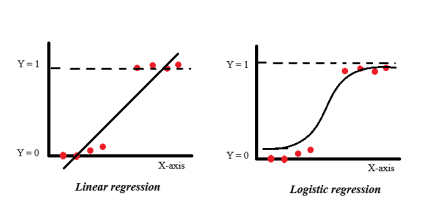

**Função logística**

Ao realizar a regressão linear, estamos prevendo um resultado numérico (digamos, o preço de venda de uma casa). Com a regressão logística, estimamos a probabilidade de que o resultado (sentimento) pertença a uma categoria específica (positiva ou negativa) dada a revisão. Como estamos estimando uma probabilidade e queremos uma saída entre 0 e 1, modelamos os valores de X usando a função sigmóide / logística, conforme mostrado no gráfico. 

`Probability(sentiment = positive|review)`

No Python, importamos `LogisticRegression` da biblioteca `sklearn.linear_model`. 

Lembre-se de que a API sklearn funciona apenas com variáveis contínuas. Ele também requer um DataFrame ou uma matriz como argumentos e não pode lidar com dados ausentes. Portanto, todas as transformações dos dados precisam ser concluídas de antemão. Chamamos a função de regressão logística e criamos um objeto classificador de logística. Nós o ajustamos especificando a matriz X, que é uma matriz numpy de nossos recursos ou um DataFrame pandas, e o vetor de alvos y.

`from sklearn.linear_model import LogisticRegression`

`from sklearn.metrics import accuracy_score`

`log_reg = LogisticRegression().fit(X,y)`

`score = log_reg.score(X,y)`


`y_predicted = log_reg.predict(X)`


`accuracy = accuracy_score(y,y_predicted)`


**Medir o desempenho do modelo**

Como sabemos se o modelo é bom? Observamos a discrepância entre o rótulo previsto e o que era o rótulo real para cada instância (observação) em nosso conjunto de dados. Uma métrica comum a ser usada é a pontuação de precisão. Embora não seja apropriado em todos os contextos, ainda é útil. A precisão nos dá a fração das previsões que nosso modelo acertou. Quanto mais alto e mais próximo de 1, melhor. Uma maneira de calcular a pontuação de precisão de um modelo de regressão logística é chamar o método de pontuação no objeto de regressão logística. Tem como argumentos a matriz X e o vetor y.

**Usando pontuação de precisão**

Alternativamente, podemos usar a função precision_score de sklearn.metrics. Existe uma função precision_score além da função score porque diferentes modelos têm diferentes métricas de pontuação padrão. Assim, a função precision_score sempre retorna a precisão, mas a função score pode retornar outras métricas se a usarmos para avaliar outros modelos. Aqui, precisamos calcular explicitamente as previsões do modelo, chamando a previsão na matriz de recursos. A pontuação de precisão toma como argumentos o vetor de rótulos verdadeiros e os rótulos previstos. Vemos, no caso da regressão logística, o valor de retorno do escore e do escore de precisão de 0,9009.

## Logistic regression using Twitter data

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np

In [20]:
tweets = pd.read_csv("dataset/Tweets.csv")
#movies = movies[['score','review']]

In [21]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [50]:
y = tweets.airline_sentiment #target
X = tweets[['airline_sentiment_confidence','negativereason_confidence','retweet_count']]

In [51]:
#X = pd.get_dummies(X)
X = X.replace(np.nan, 0)

In [52]:
log_reg = LogisticRegression().fit(X,y)
print('Accuracy of logistic regression: ', log_reg.score(X,y))

Accuracy of logistic regression:  0.8386612021857923


In [53]:
y_predict = log_reg.predict(X)

# Print the accuracy using accuracy score
print('Accuracy of logistic regression: ', accuracy_score(y,y_predict))

Accuracy of logistic regression:  0.8386612021857923


## Predict Sentiment well

### Build and assess a model: movies reviews

In [ ]:
# Import the required packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define the vector of labels and matrix of features
y = movies.label
X = movies.drop('label', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a logistic regression model and print out the accuracy
log_reg = LogisticRegression().fit(X_train, y_train)
print('Accuracy on train set: ', log_reg.score(X_train, y_train))
print('Accuracy on test set: ', log_reg.score(X_test, y_test))

### Performance metrics of Twitter data

In [37]:
# Import the required packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [54]:
tweets = pd.read_csv("dataset/Tweets.csv")


y = tweets.airline_sentiment #target
X = tweets[['airline_sentiment_confidence','negativereason_confidence','retweet_count']]
X = X.replace(np.nan, 0)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

In [56]:
# Train a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)

# Make predictions on the test set
y_predicted = log_reg.predict(X_test)

In [57]:
# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy score test set:  0.8385701275045537
Confusion matrix test set: 
 [[0.62682149 0.         0.        ]
 [0.         0.21174863 0.        ]
 [0.         0.16142987 0.        ]]


## Logistic regression: revisted

** Modelos complexos e regularização **

Um modelo complexo pode ocorrer em alguns cenários. 

Se usarmos uma função muito complicada para explicar a relação de interesse, inevitavelmente ajustaremos o ruído nos dados. 

Esse modelo não terá um bom desempenho quando usado para pontuar dados não vistos. Isso também é chamado de overfitting. Um modelo complexo pode resultar da inclusão de muitos recursos e parâmetros desnecessários; especialmente com dados de texto transformados, onde podemos criar milhares de colunas numéricas extras. Essas duas fontes de complexidade geralmente andam de mãos dadas. Uma maneira de desencorajar artificialmente modelos complexos é pelo uso de regularização. Ao usar a regularização, estamos penalizando ou restringindo a função do modelo.

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
LogisticRegression(penalty='l2',C=1.0)

LogisticRegression()

A regularização é aplicada por padrão na função de regressão logística do sklearn. 

Ele usa a chamada penalidade L2, intuitivamente é bom saber que a penalidade L2 reduz todos os coeficientes para zero, reduzindo efetivamente o impacto de cada feature. 

O parâmetro que determina a força de regularização é dado por C, que assume o valor padrão 1. Valores maiores de C correspondem a menos regularização, ou seja, o modelo tentará ajustar os dados da melhor forma possível. Valores pequenos de C correspondem a alta penalização (ou regularização), significando que os coeficientes da regressão logística ficarão mais próximos de zero. O modelo será menos flexível porque não se ajustará tão bem aos dados de treinamento. 

Como encontrar o valor mais adequado de C? 

Normalmente, precisamos testar valores diferentes e ver qual deles nos dá o melhor desempenho nos dados de teste.

**Previsão de probabilidade vs. previsão de classe**

Você deve se lembrar que, quando treinamos um modelo de regressão logística, aplicamos a função de previsão ao conjunto de testes para prever os rótulos. A função de previsão prevê uma classe: 0 ou 1 se estivermos trabalhando com um classificador binário. No entanto, em vez de uma classe, podemos prever uma probabilidade usando a função predict_proba. Mais uma vez, passamos como argumento o conjunto de dados de teste.

**Previsão de probabilidade vs. previsão de classe**

Isso retorna uma matriz de probabilidades, ordenada pelo rótulo das classes - primeiro a classe 0 e depois a classe 1. As probabilidades de cada observação são exibidas em uma linha separada. O primeiro valor é a probabilidade de que a instância seja da classe 0, e o segundo de uma classe 1. Portanto, é comum ao prever as probabilidades especificar já que queremos extrair as probabilidades da classe 1.

**Modelar métricas com probabilidades previstas** 

Uma coisa importante a saber é que não podemos aplicar diretamente a pontuação de precisão ou a matriz de confusão às probabilidades previstas. Se você fizer isso no sklearn, receberá um ValueError. A razão é que a precisão e a matriz de confusão funcionam diretamente com as classes. Se tivermos probabilidades previstas, precisamos codificá-las como classes. O padrão é que qualquer probabilidade maior ou igual a 0,5 é traduzida para a classe 1, caso contrário, para a classe 0. No entanto, você pode alterar esse limite dependendo do seu problema. Imagine que apenas 1% das avaliações são positivas e você construiu um modelo para prever se uma nova avaliação é positiva ou negativa. Nesse contexto, você não deseja converter nenhuma probabilidade prevista maior do que 0,5 para a classe 1, esse limite deve ser muito menor.

### Predict probabilities of movie reviews

In [ ]:
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321)

# Train a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)

# Predict the probability of the 0 class
prob_0 = log_reg.predict_proba(X_test)[:, 0]
# Predict the probability of the 1 class
prob_1 = log_reg.predict_proba(X_test)[:, 1]

print("First 10 predicted probabilities of class 0: ", prob_0[:10])
print("First 10 predicted probabilities of class 1: ", prob_1[:10])

### Product reviews with regularization

In [ ]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=123)

# Train a logistic regression with regularization of 1000
log_reg1 = LogisticRegression(C=1000).fit(X_train, y_train)
# Train a logistic regression with regularization of 0.001
log_reg2 = LogisticRegression(C=0.001).fit(X_train, y_train)

# Print the accuracies
print('Accuracy of model 1: ', log_reg1.score(X_test, y_test))
print('Accuracy of model 2: ', log_reg2.score(X_test, y_test))

### Regularizing models with Twitter data

In [71]:
tweets = pd.read_csv("dataset/Tweets.csv")
y = tweets.airline_sentiment #target
X = tweets[['airline_sentiment_confidence','negativereason_confidence','retweet_count']]
X = X.replace(np.nan, 0)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [73]:
log_reg1 = LogisticRegression(C=100).fit(X_train, y_train)
log_reg2 = LogisticRegression(C=0.1).fit(X_train, y_train)

In [74]:
y_predict1 = log_reg1.predict(X_test)
y_predict2 = log_reg2.predict(X_test)

In [75]:
# Print performance metrics for each model
print('Accuracy of model 1: ', log_reg1.score(X_test, y_test))
print('Accuracy of model 2: ', log_reg2.score(X_test, y_test))

Accuracy of model 1:  0.8451730418943534
Accuracy of model 2:  0.8451730418943534


In [76]:
print('Confusion matrix of model 1: \n' , confusion_matrix(y_test, y_predict1)/len(y_test))
print('Confusion matrix of model 2: \n', confusion_matrix(y_test, y_predict2)/len(y_test))

Confusion matrix of model 1: 
 [[0.6318306  0.         0.        ]
 [0.         0.21220401 0.00182149]
 [0.         0.15300546 0.00113843]]
Confusion matrix of model 2: 
 [[0.6318306  0.         0.        ]
 [0.         0.21220401 0.00182149]
 [0.         0.15300546 0.00113843]]


## Bringing it all together

### Step 1: Word cloud and feature creation

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, ENGLISH_STOP_WORDS

from wordcloud import WordCloud, STOPWORDS
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import pandas as pd

In [79]:
review = pd.read_csv('dataset/amazon_reviews_sample.csv')
review = review[['score','review']]

In [80]:
review.head()

,score,review
0,1,Stuning even for the non-gamer: This sound tr...
1,1,The best soundtrack ever to anything.: I'm re...
2,1,Amazing!: This soundtrack is my favorite musi...
3,1,Excellent Soundtrack: I truly like this sound...
4,1,"Remember, Pull Your Jaw Off The Floor After H..."


In [95]:
positive_reviews = review[review['score']==1]
positive_reviews_values = ' '.join(map(str, positive_reviews.review))

negative_reviews = review[review['score']==0]
pnegative_reviews_values = ' '.join(map(str, negative_reviews.review))

In [94]:
cloud_positives = WordCloud(background_color='white').generate(positive_reviews_values)

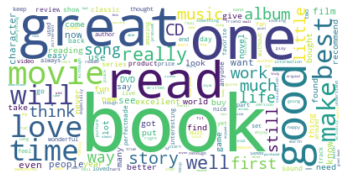

In [96]:
# Display the generated wordcloud image
plt.imshow(cloud_positives, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()

In [97]:
word_tokens = [word_tokenize(review) for review in review.review]

In [99]:
len_tokens = []

for i in range(len(word_tokens)):
     len_tokens.append(len(word_tokens[i]))

review['n_words'] = len_tokens 

### Step 2: Building a vectorizer

In [101]:
# Build the vectorizer
vect = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1, 2), max_features=200, token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(review.review)
# Create sparse matrix from the vectorizer
X = vect.transform(review.review)

# Create a DataFrame
reviews_transformed = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
print('Top 5 rows of the DataFrame: \n', reviews_transformed.head())

Top 5 rows of the DataFrame: 
    able  action  actually  ago  album   amazing  amazon  author      away  \
0   0.0     0.0       0.0  0.0    0.0  0.000000     0.0     0.0  0.274041   
1   0.0     0.0       0.0  0.0    0.0  0.000000     0.0     0.0  0.000000   
2   0.0     0.0       0.0  0.0    0.0  0.382773     0.0     0.0  0.000000   
3   0.0     0.0       0.0  0.0    0.0  0.000000     0.0     0.0  0.000000   
4   0.0     0.0       0.0  0.0    0.0  0.000000     0.0     0.0  0.000000   

   bad  ...      work  works  world  worst     worth  writing  written  wrong  \
0  0.0  ...  0.000000    0.0    0.0    0.0  0.000000      0.0      0.0    0.0   
1  0.0  ...  0.000000    0.0    0.0    0.0  0.219408      0.0      0.0    0.0   
2  0.0  ...  0.142935    0.0    0.0    0.0  0.160089      0.0      0.0    0.0   
3  0.0  ...  0.000000    0.0    0.0    0.0  0.000000      0.0      0.0    0.0   
4  0.0  ...  0.000000    0.0    0.0    0.0  0.000000      0.0      0.0    0.0   

   year     years  

### Step 3: Building a classifier

In [106]:
# Define X and y
y = review.score
X = reviews_transformed

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=456)

In [110]:
# Train a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)
# Predict the labels
y_predicted = log_reg.predict(X_test)

In [112]:
# Print accuracy score and confusion matrix on test set
print('Accuracy on the test set: ', accuracy_score(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy on the test set:  0.789
[[0.412 0.114]
 [0.097 0.377]]
